In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
data = pd.read_excel('xyz.xlsx')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [50]:
print(data.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [51]:
# Drop irrelevant columns (e.g., 'ID', 'Dt_Customer')
data.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)

In [52]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [53]:
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [54]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [55]:
data.duplicated().sum()

182

In [56]:
data.drop_duplicates(inplace=True)

In [57]:
data.duplicated().sum()

0

In [58]:
data.dropna(inplace=True)

In [59]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [60]:
data.shape

(2034, 27)

In [61]:
# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

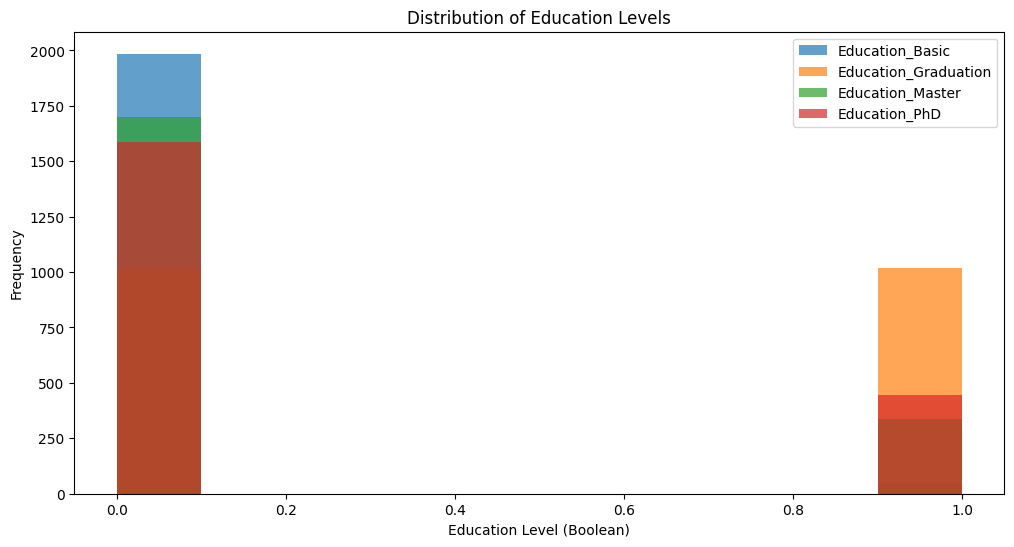

In [62]:
education_columns = ['Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']
plt.figure(figsize=(12, 6))
for col in education_columns:
    # Convert boolean values to numerical (0 and 1) before plotting
    plt.hist(data[col].astype(int), alpha=0.7, label=col)
plt.xlabel("Education Level (Boolean)")
plt.ylabel("Frequency")
plt.title("Distribution of Education Levels")
plt.legend()
plt.show()

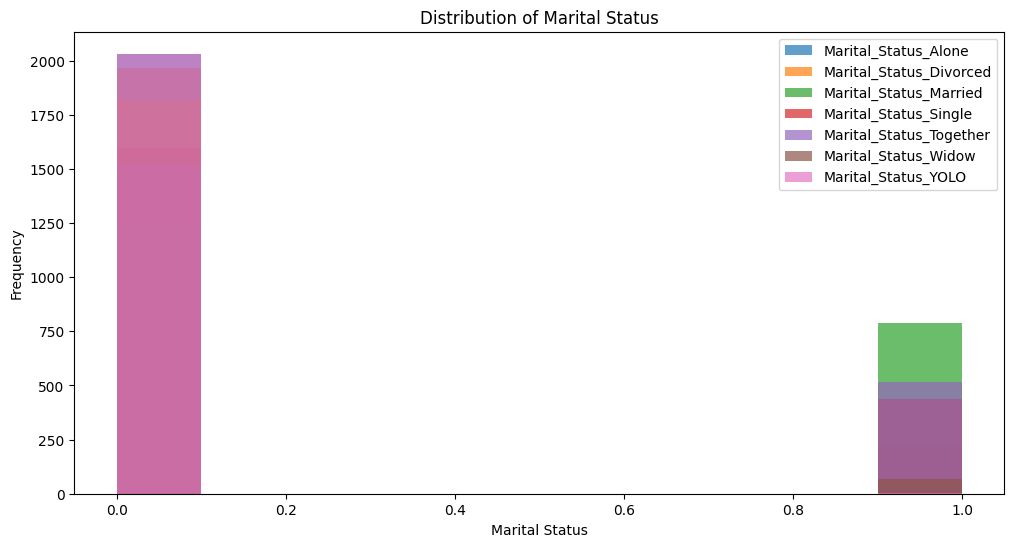

In [63]:
# Histogram for Marital Status categories
marital_status_columns = ['Marital_Status_Alone', 'Marital_Status_Divorced',
                          'Marital_Status_Married', 'Marital_Status_Single',
                          'Marital_Status_Together', 'Marital_Status_Widow',
                          'Marital_Status_YOLO']  # Add 'Marital_Status_YOLO'

plt.figure(figsize=(12, 6))
for column in marital_status_columns:
    if column in data.columns:  # Check if the column exists in the DataFrame
        # Convert boolean values to numerical (0 and 1) before plotting
        plt.hist(data[column].astype(int), alpha=0.7, label=column)
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Distribution of Marital Status')
plt.legend()
plt.show()

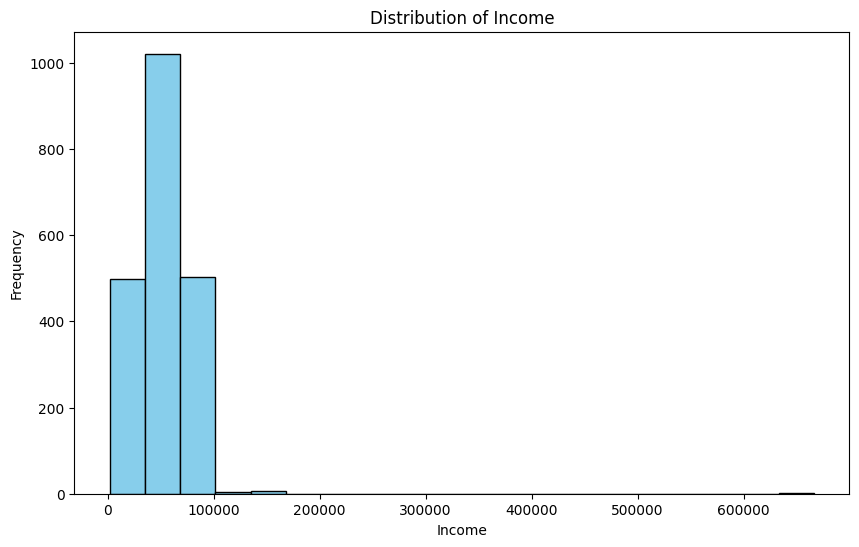

In [64]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

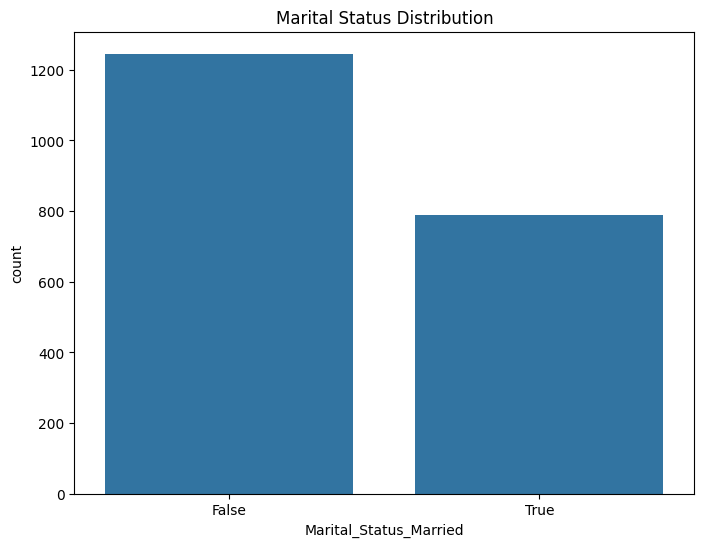

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status_Married', data=data)
plt.title('Marital Status Distribution')
plt.show()

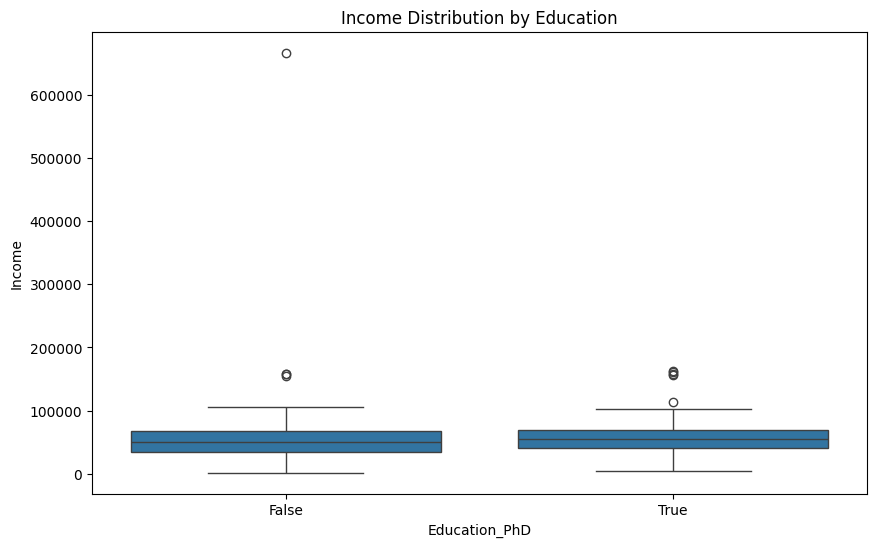

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_PhD', y='Income', data=data)
plt.title('Income Distribution by Education')
plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2034 non-null   int64  
 1   Income                   2034 non-null   float64
 2   Kidhome                  2034 non-null   int64  
 3   Teenhome                 2034 non-null   int64  
 4   Recency                  2034 non-null   int64  
 5   MntWines                 2034 non-null   int64  
 6   MntFruits                2034 non-null   int64  
 7   MntMeatProducts          2034 non-null   int64  
 8   MntFishProducts          2034 non-null   int64  
 9   MntSweetProducts         2034 non-null   int64  
 10  MntGoldProds             2034 non-null   int64  
 11  NumDealsPurchases        2034 non-null   int64  
 12  NumWebPurchases          2034 non-null   int64  
 13  NumCatalogPurchases      2034 non-null   int64  
 14  NumStorePurchases        2034

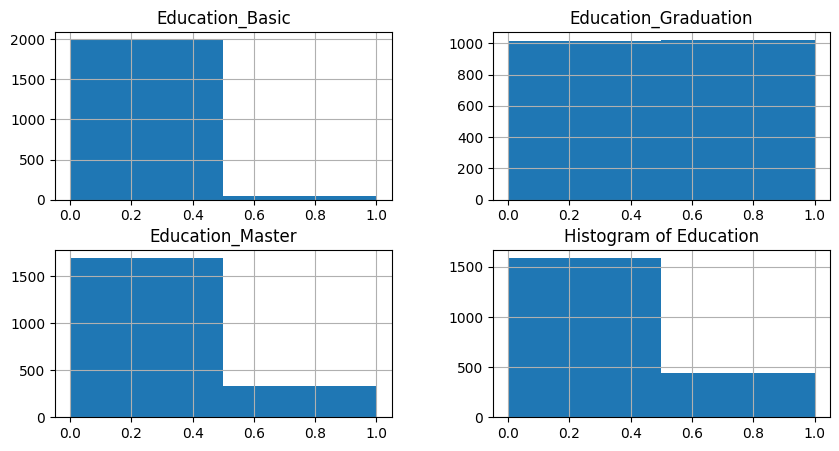

In [68]:
data[['Education_Basic','Education_Graduation','Education_Master','Education_PhD']].astype(int).hist(figsize=(10,5), bins=2)
plt.title('Histogram of Education')  # Changed title to 'Histogram'
plt.show()

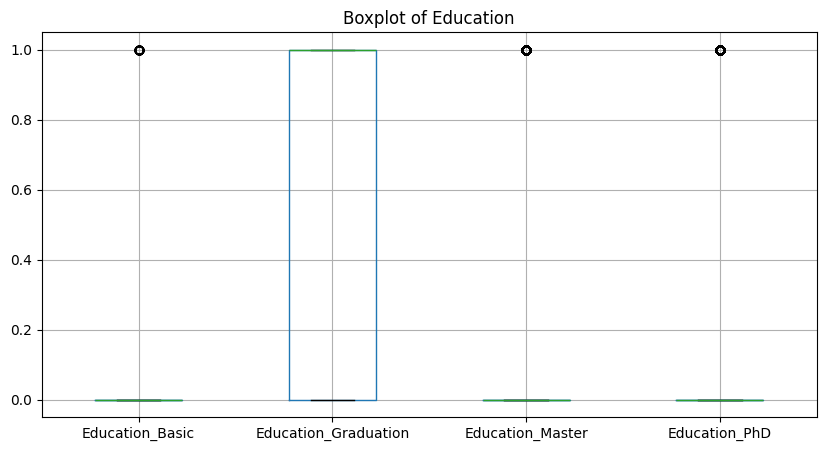

In [69]:
data.boxplot(column=['Education_Basic','Education_Graduation','Education_Master','Education_PhD'],figsize=(10,5))
plt.title('Boxplot of Education')
plt.show()

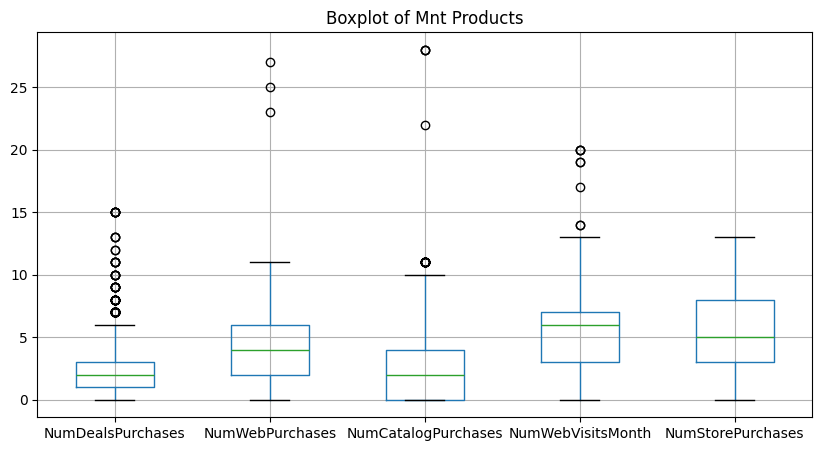

In [70]:
data.boxplot(column=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth','NumStorePurchases'],figsize=(10,5))
plt.title('Boxplot of Mnt Products')
plt.show()

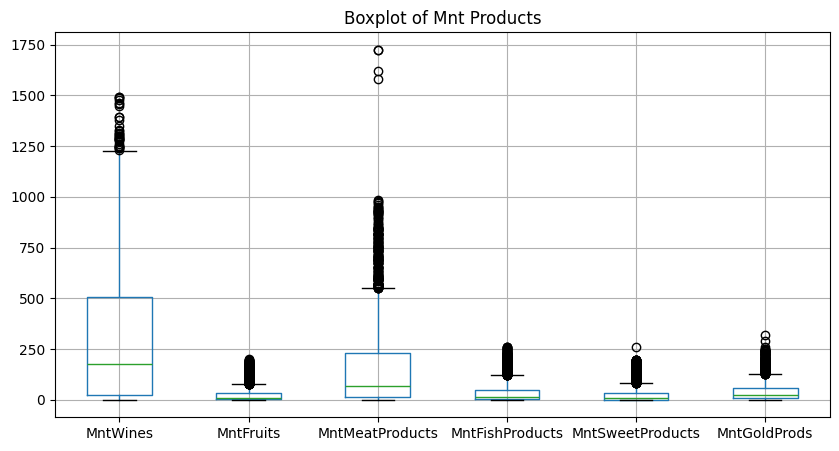

In [71]:
data.boxplot(column=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],figsize=(10,5))
plt.title('Boxplot of Mnt Products')
plt.show()

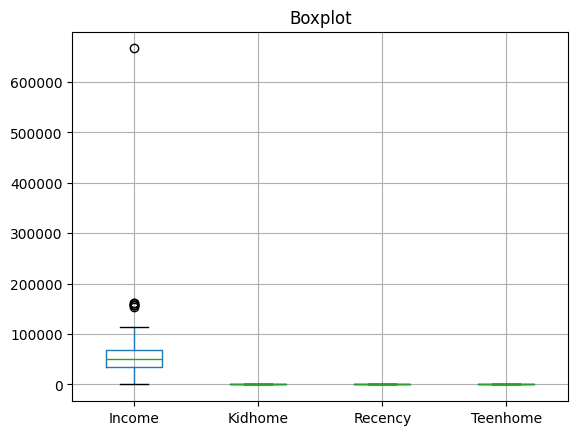

In [72]:
data.boxplot(column=['Income','Kidhome','Recency','Teenhome'])
plt.title('Boxplot')
plt.show()

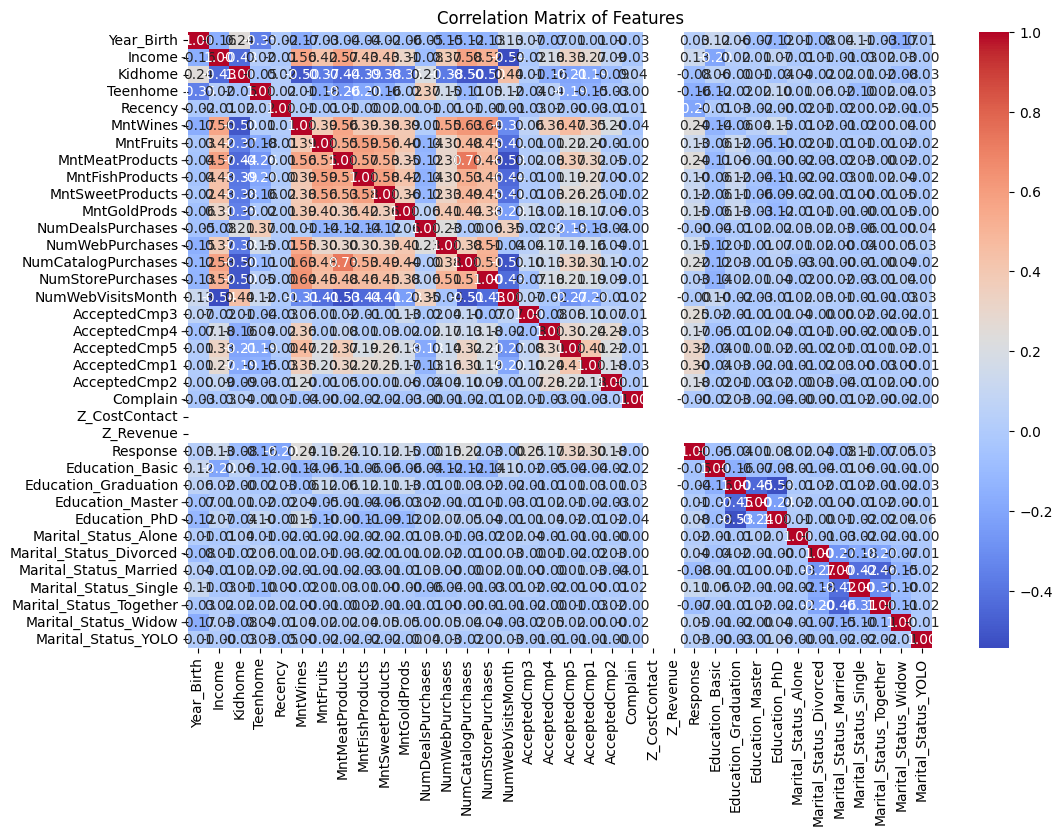

In [73]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

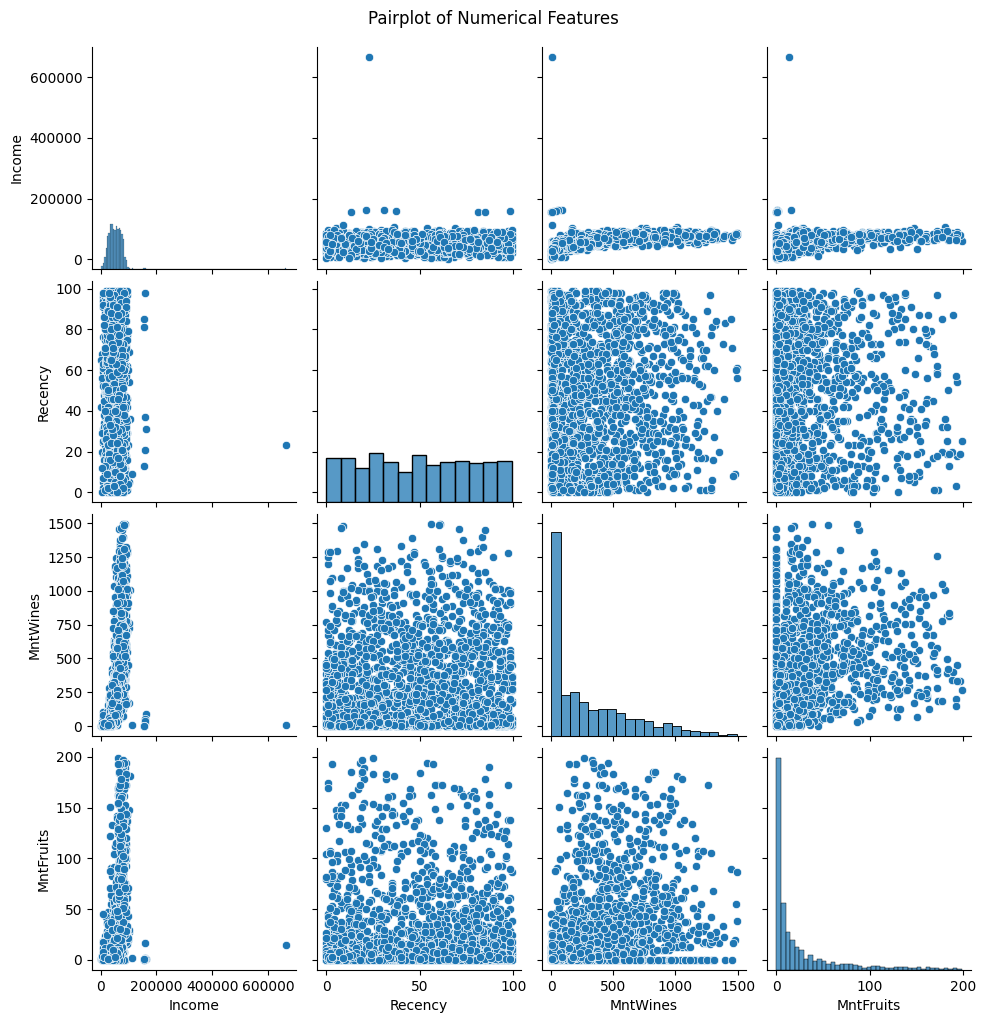

In [74]:
# Pairplot for selected numerical features
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits'] # Example numerical features
sns.pairplot(data[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Model Building

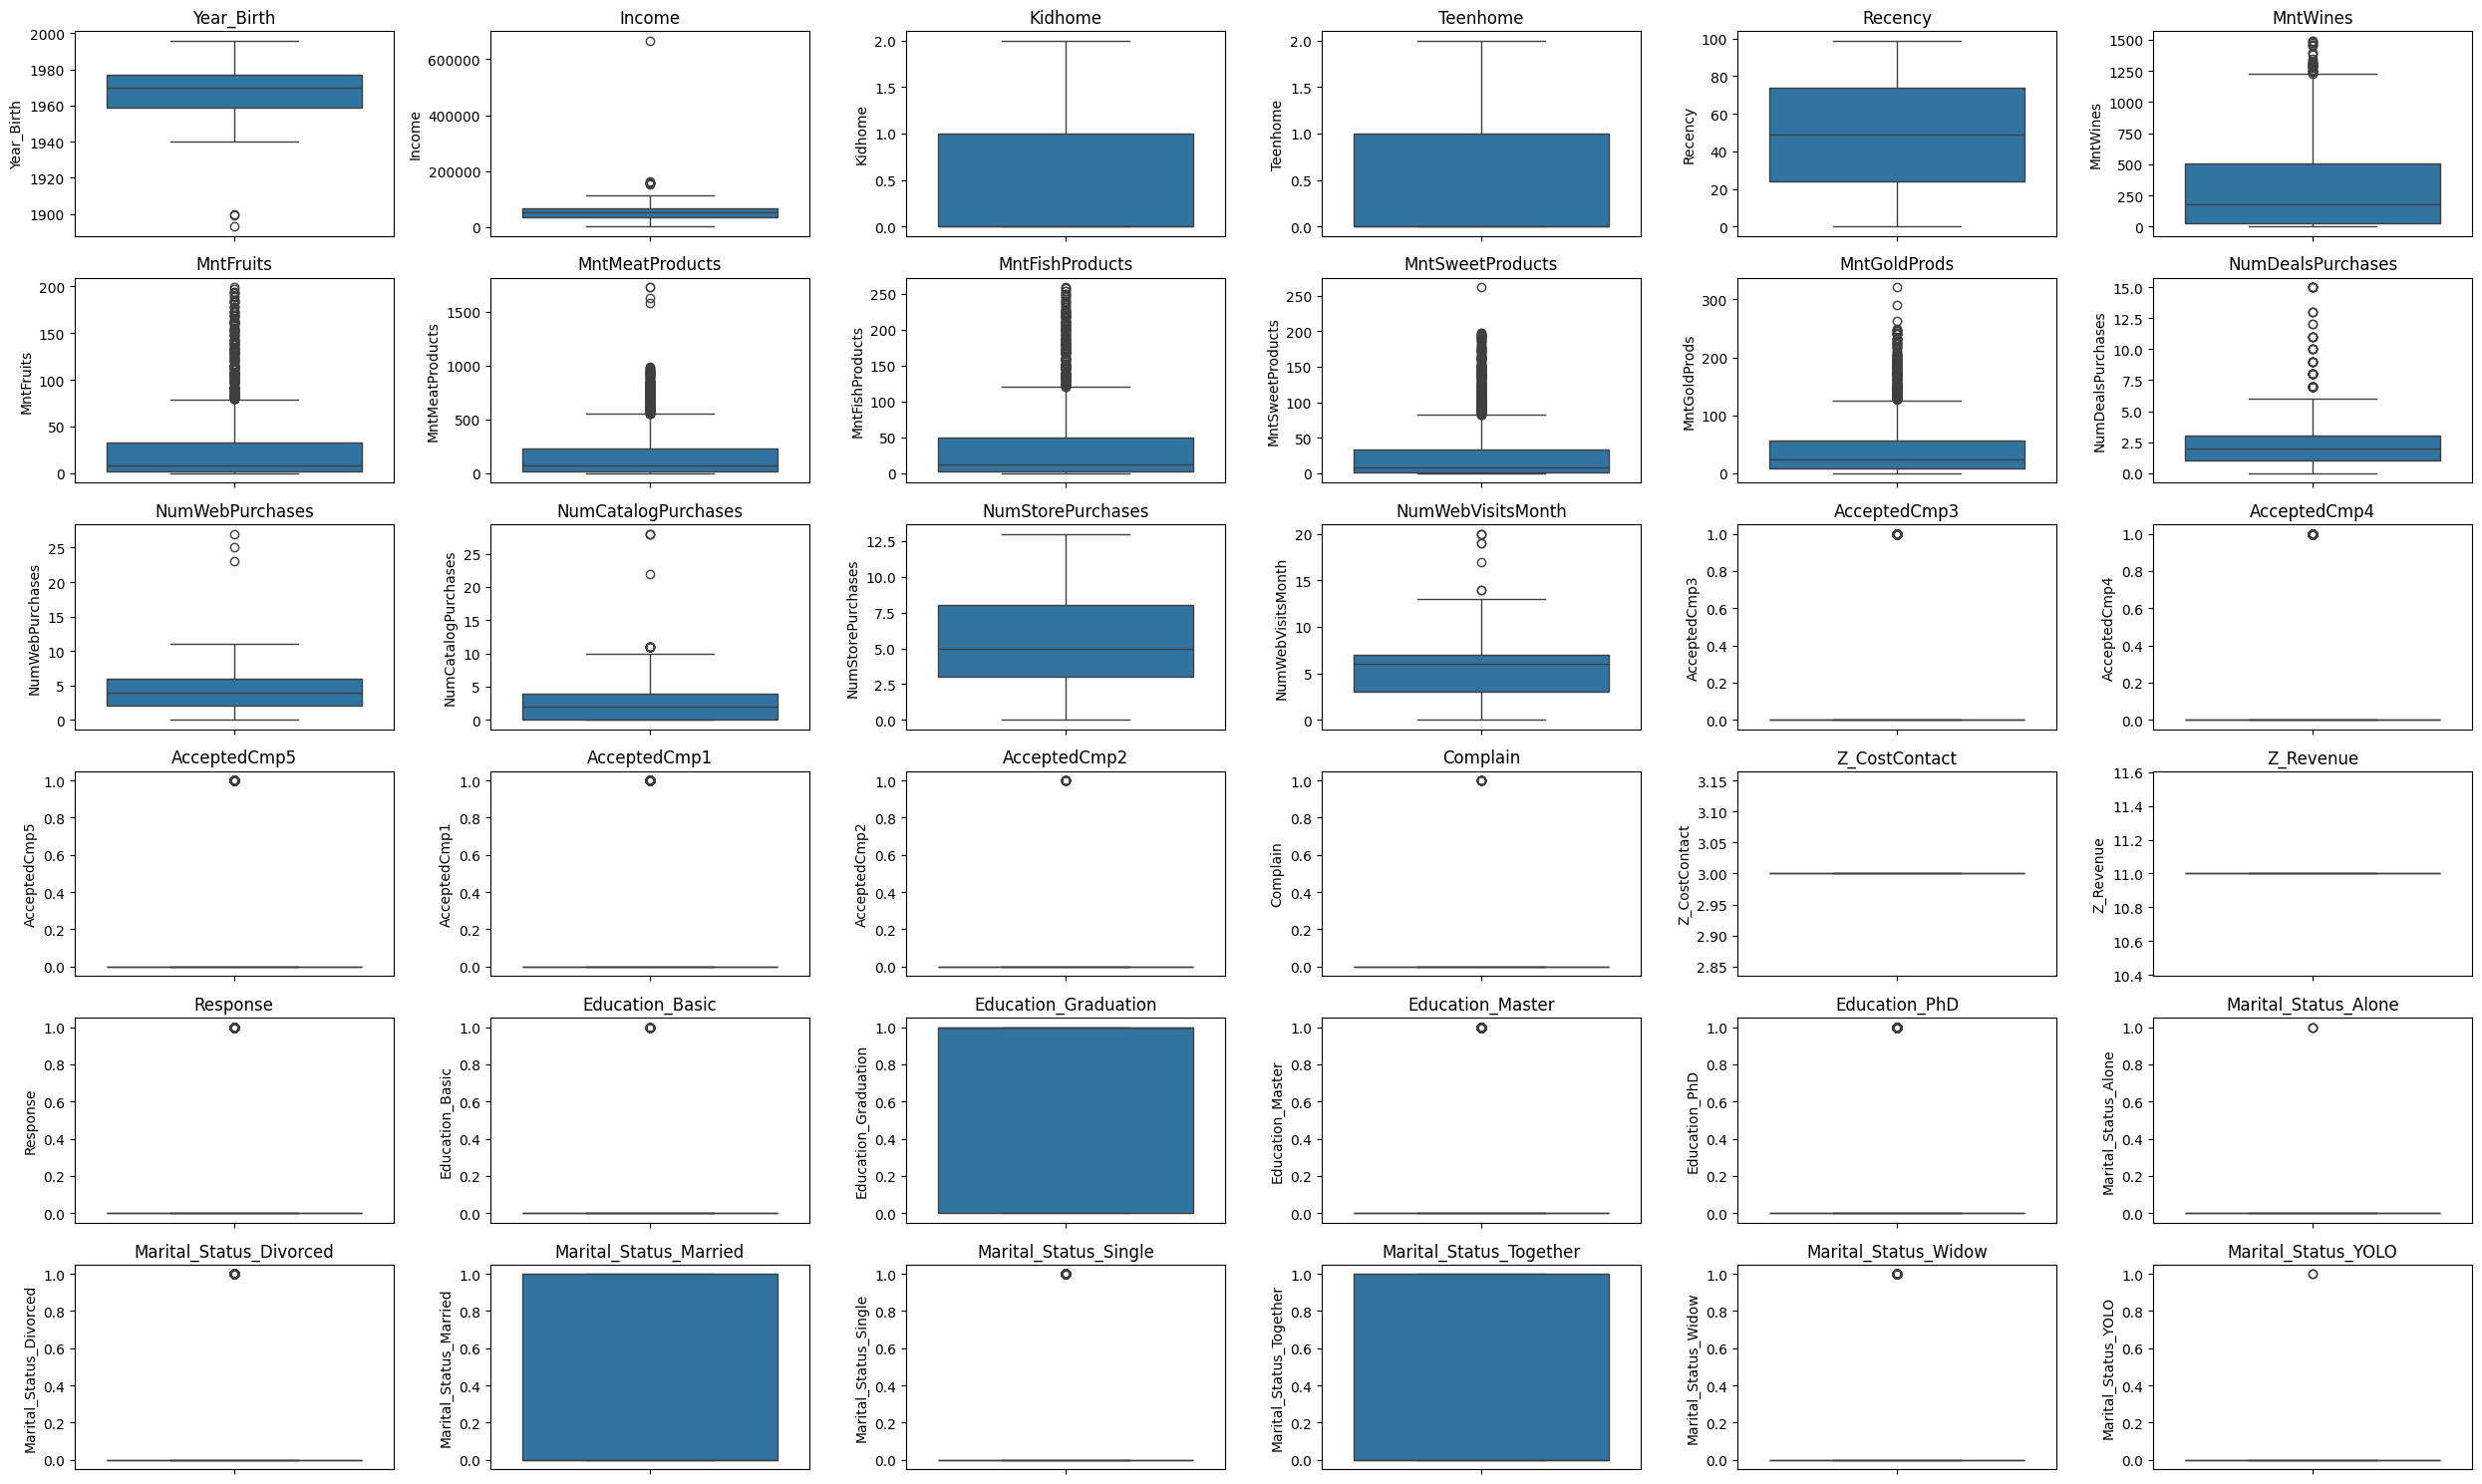

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(data=data, y=column)  # Use data=data and y=column
    plt.title(column)  # Add title to each subplot
plt.tight_layout()
plt.show()

In [76]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize instead of dropping
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df


numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    data = handle_outliers(data, col)

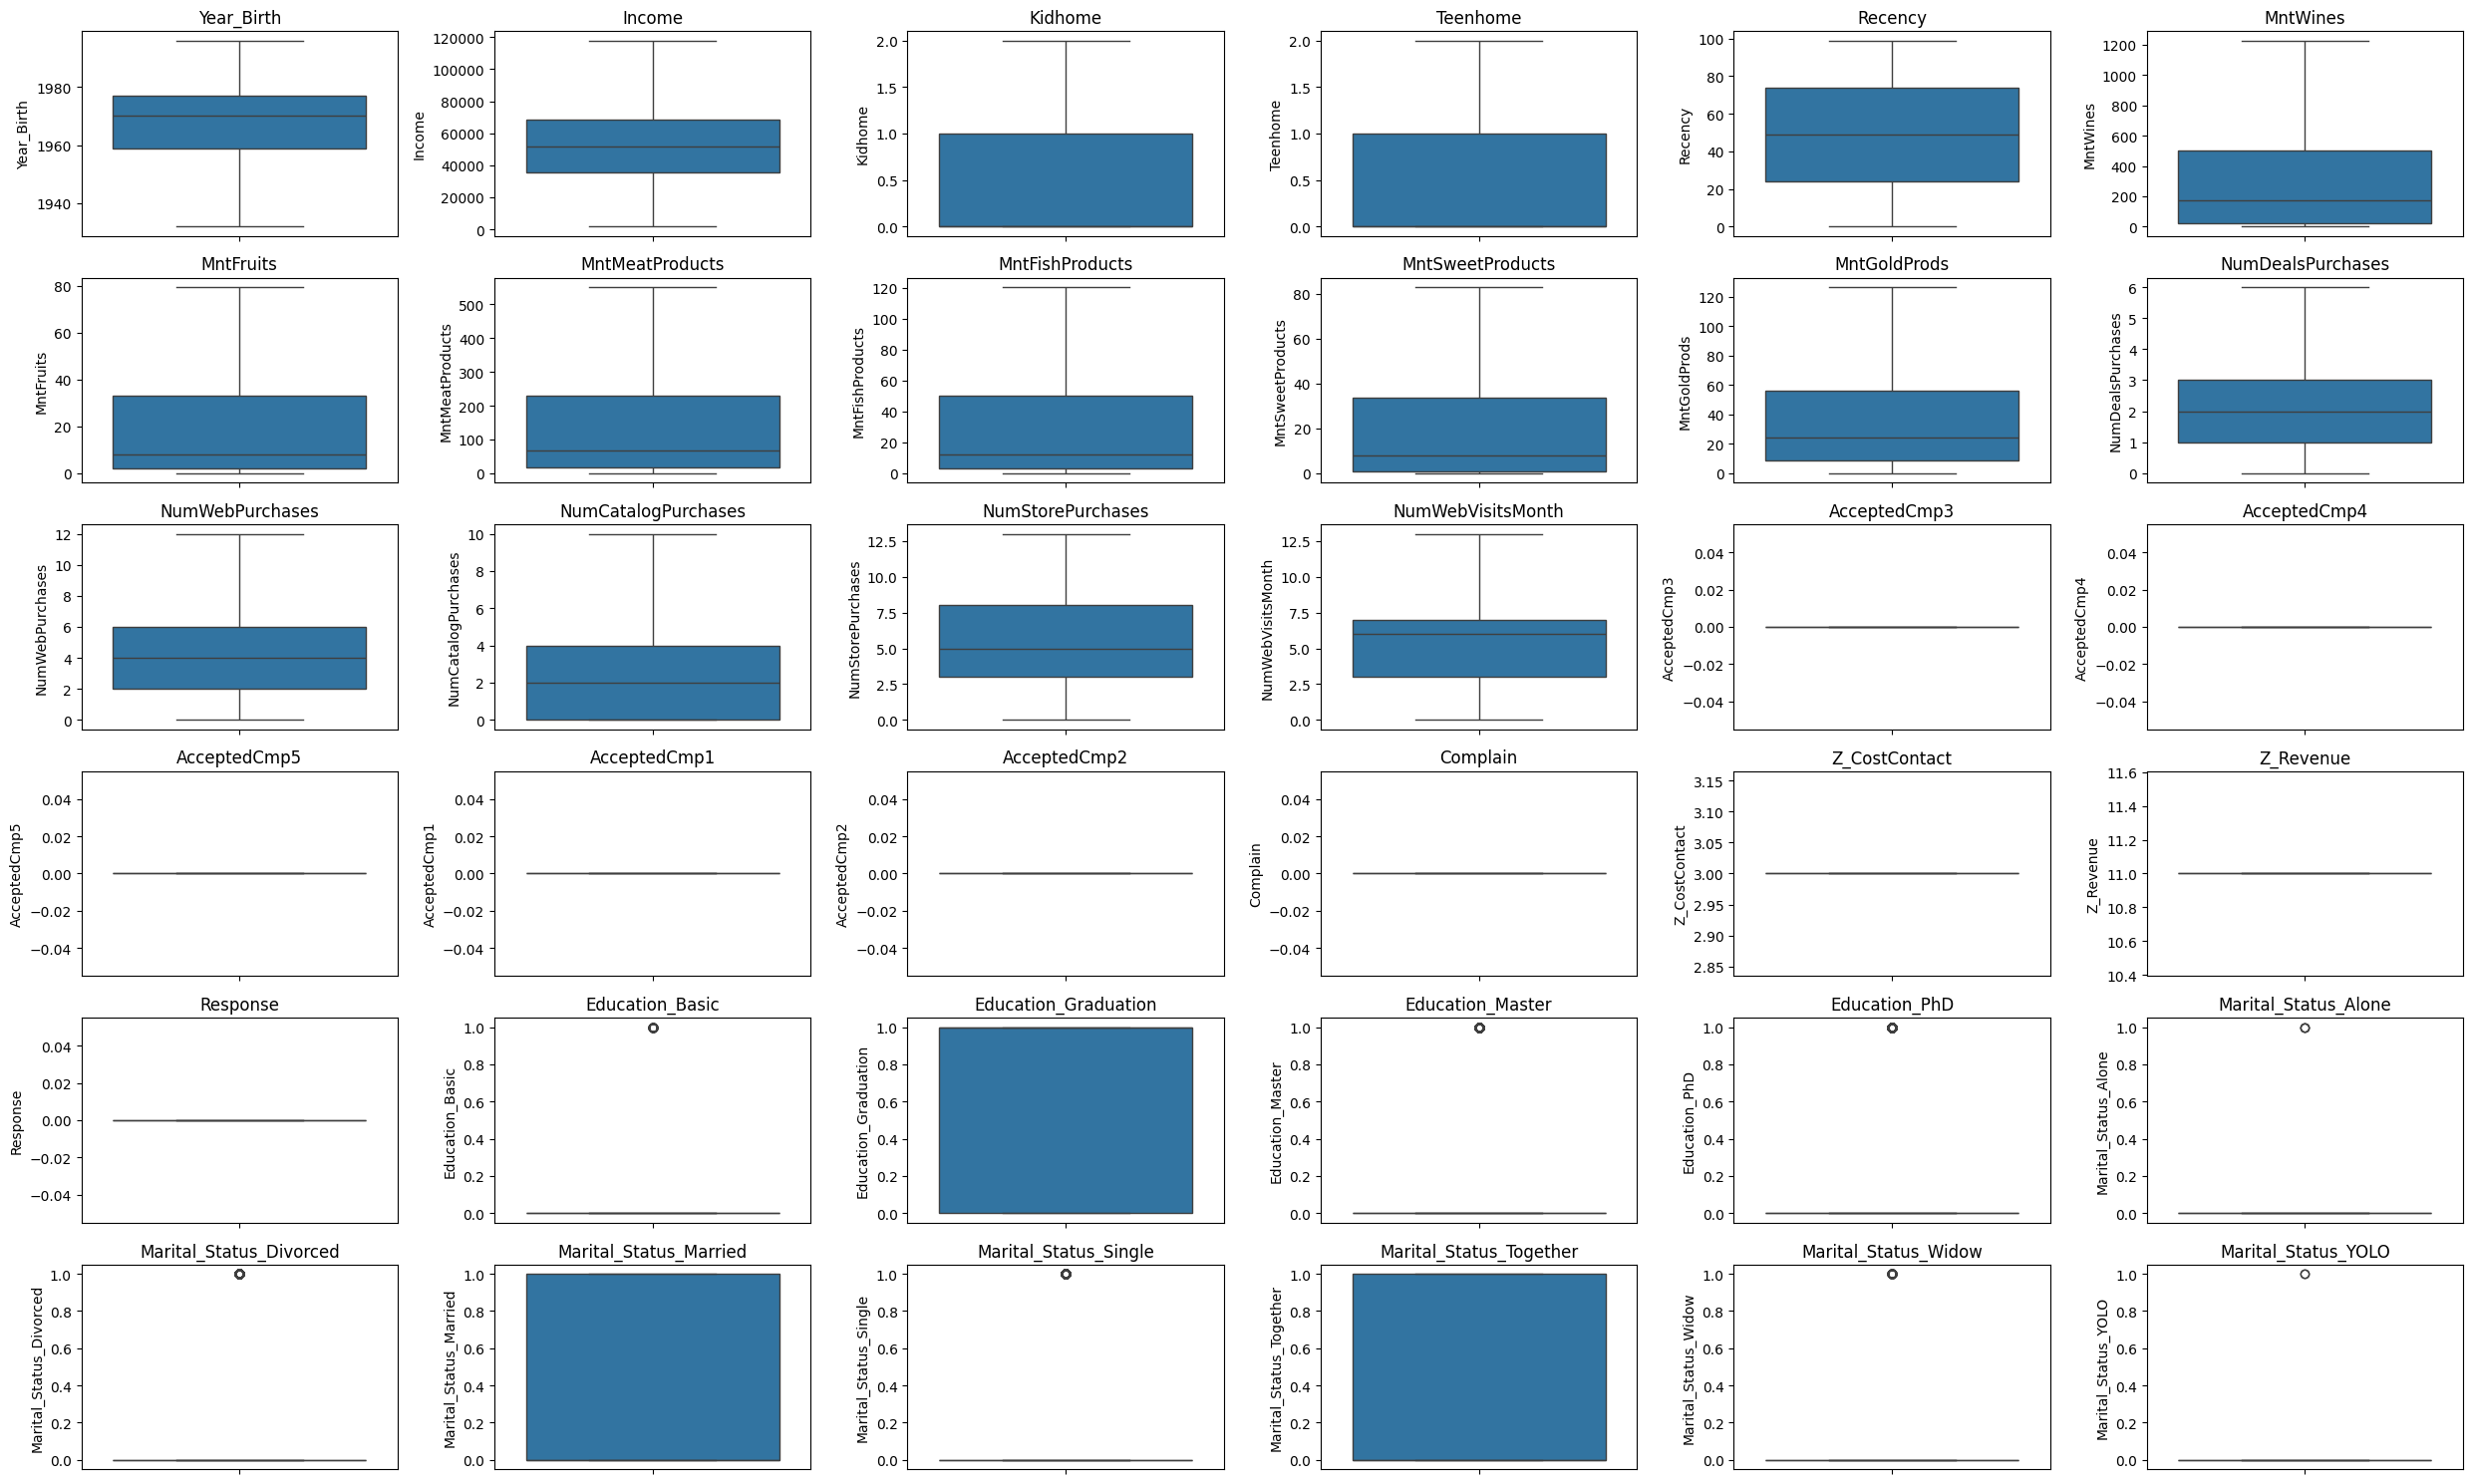

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25, 15))

for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(data=data, y=column)  # Use data=data and y=column
    plt.title(column)  # Add title to each subplot
plt.tight_layout()
plt.show()

In [78]:
# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [79]:
# Determine optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


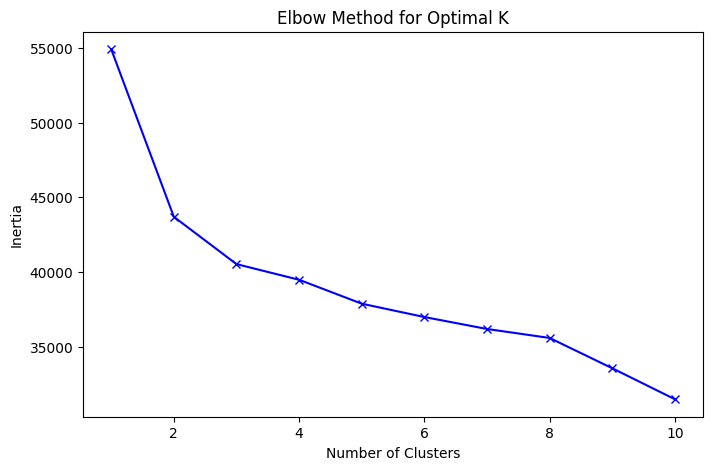

In [80]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [93]:
# Apply K-Means clustering with optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)
data['KMeans_Cluster']

0       0
1       2
2       0
3       2
4       1
       ..
2233    2
2235    0
2237    0
2238    0
2239    2
Name: KMeans_Cluster, Length: 2034, dtype: int32

In [82]:
# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(scaled_data, data['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.15367623683485424


In [94]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster']

0       -1
1        7
2       -1
3        0
4       -1
        ..
2233    -1
2235    -1
2237    -1
2238    -1
2239    11
Name: DBSCAN_Cluster, Length: 2034, dtype: int64

In [84]:
# Evaluate DBSCAN clustering
if len(set(data['DBSCAN_Cluster'])) > 1:  # Ensure there is more than one cluster
    dbscan_silhouette = silhouette_score(scaled_data, data['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN produced a single cluster or noise.")

DBSCAN Silhouette Score: -0.1535606560989192


In [95]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(scaled_data)

# Evaluate Agglomerative Clustering
agglo_silhouette = silhouette_score(scaled_data, data['Agglo_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette}")
data['Agglo_Cluster']

Agglomerative Clustering Silhouette Score: 0.13347120142025606


0       2
1       0
2       2
3       0
4       2
       ..
2233    0
2235    2
2237    2
2238    2
2239    0
Name: Agglo_Cluster, Length: 2034, dtype: int64

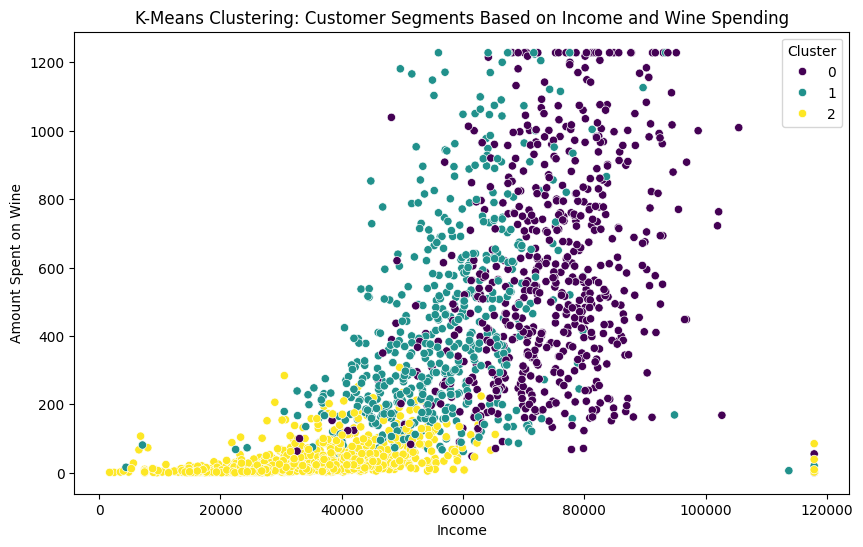

In [87]:
# Visualization for K-Means (example)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='MntWines', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering: Customer Segments Based on Income and Wine Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')
plt.legend(title='Cluster')
plt.show()

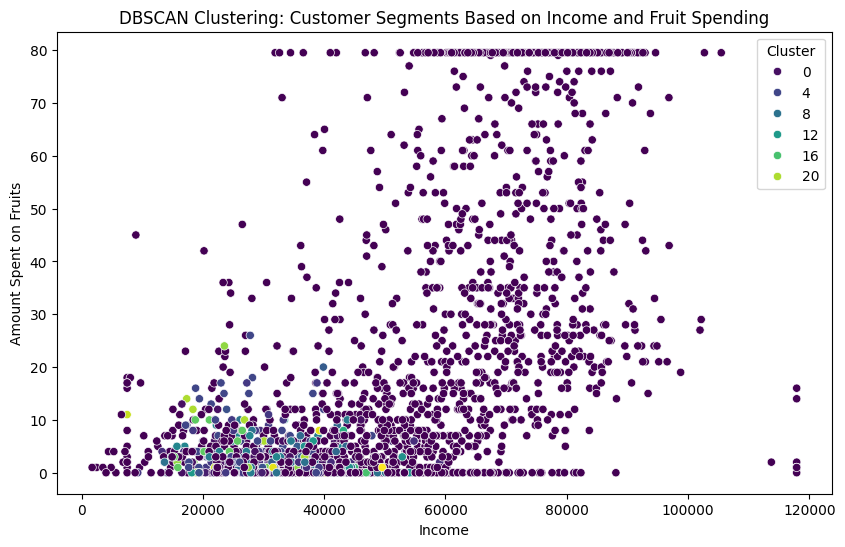

In [89]:
# Visualization for DBSCAN (example)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='MntFruits', hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clustering: Customer Segments Based on Income and Fruit Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Fruits')
plt.legend(title='Cluster')
plt.show()

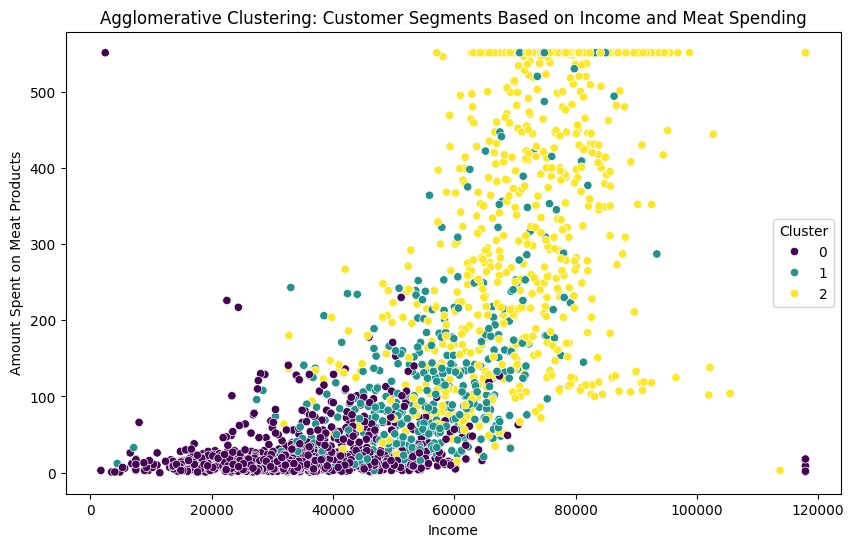

In [90]:

# Visualization for Agglomerative Clustering (example)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='MntMeatProducts', hue='Agglo_Cluster', palette='viridis')
plt.title('Agglomerative Clustering: Customer Segments Based on Income and Meat Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Meat Products')
plt.legend(title='Cluster')
plt.show()



---

---



---





---



# Model Evaluation

In [86]:
# Compare Clustering Methods
results = {
    'K-Means': kmeans_silhouette,
    'DBSCAN': dbscan_silhouette if 'dbscan_silhouette' in locals() else 'N/A',
    'Agglomerative': agglo_silhouette
}
print("\nClustering Method Comparison:")
for method, score in results.items():
    print(f"{method}: {score}")


Clustering Method Comparison:
K-Means: 0.15367623683485424
DBSCAN: -0.1535606560989192
Agglomerative: 0.13347120142025606


In [88]:
best_method = max(results, key=results.get)
best_score = results[best_method]

print(f"\nThe best clustering method is: {best_method} with a Silhouette Score of {best_score}")


The best clustering method is: K-Means with a Silhouette Score of 0.15367623683485424


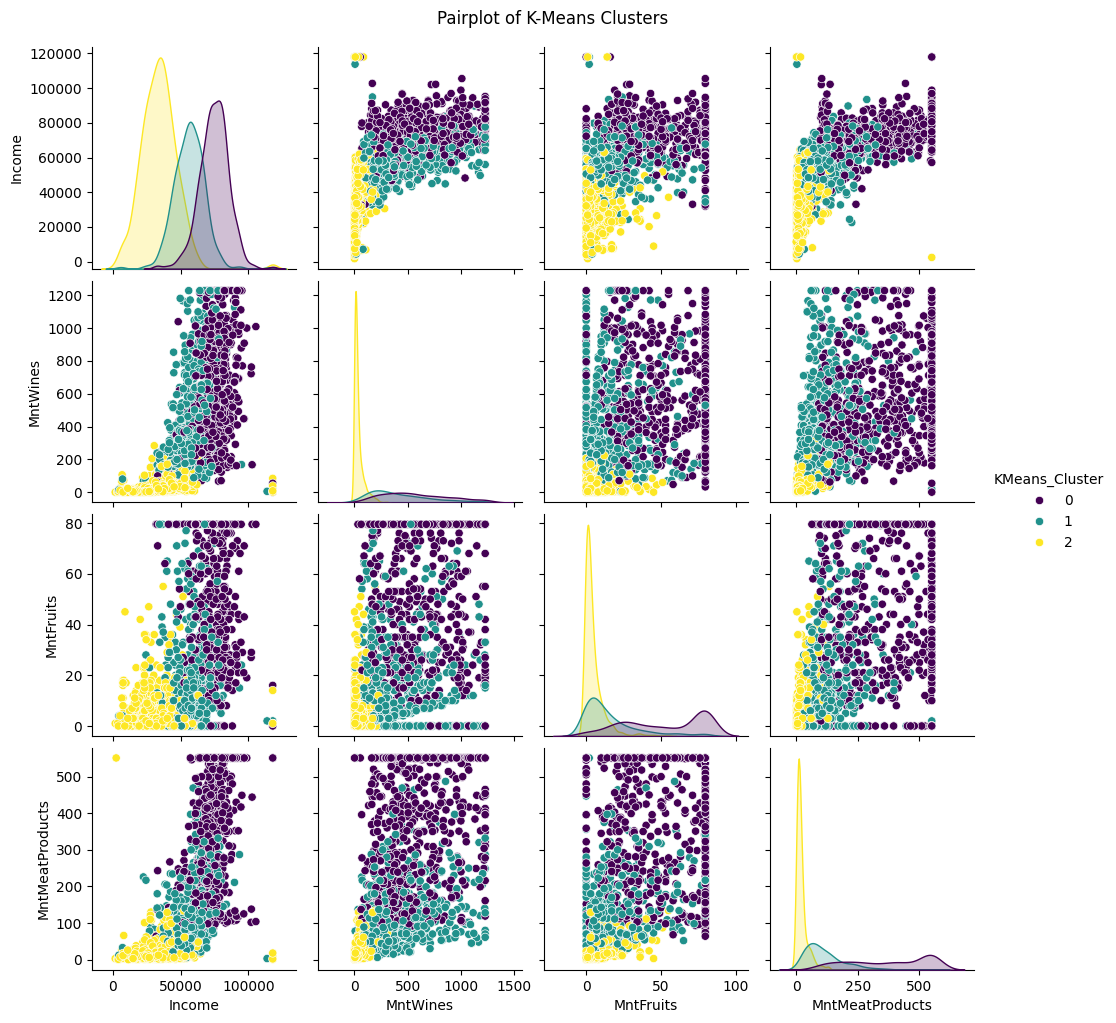

In [91]:
# Pairplot for visualizing relationships between multiple features and clusters (K-Means example)
sns.pairplot(data, hue='KMeans_Cluster', vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts'], palette='viridis')
plt.suptitle('Pairplot of K-Means Clusters', y=1.02)
plt.show()

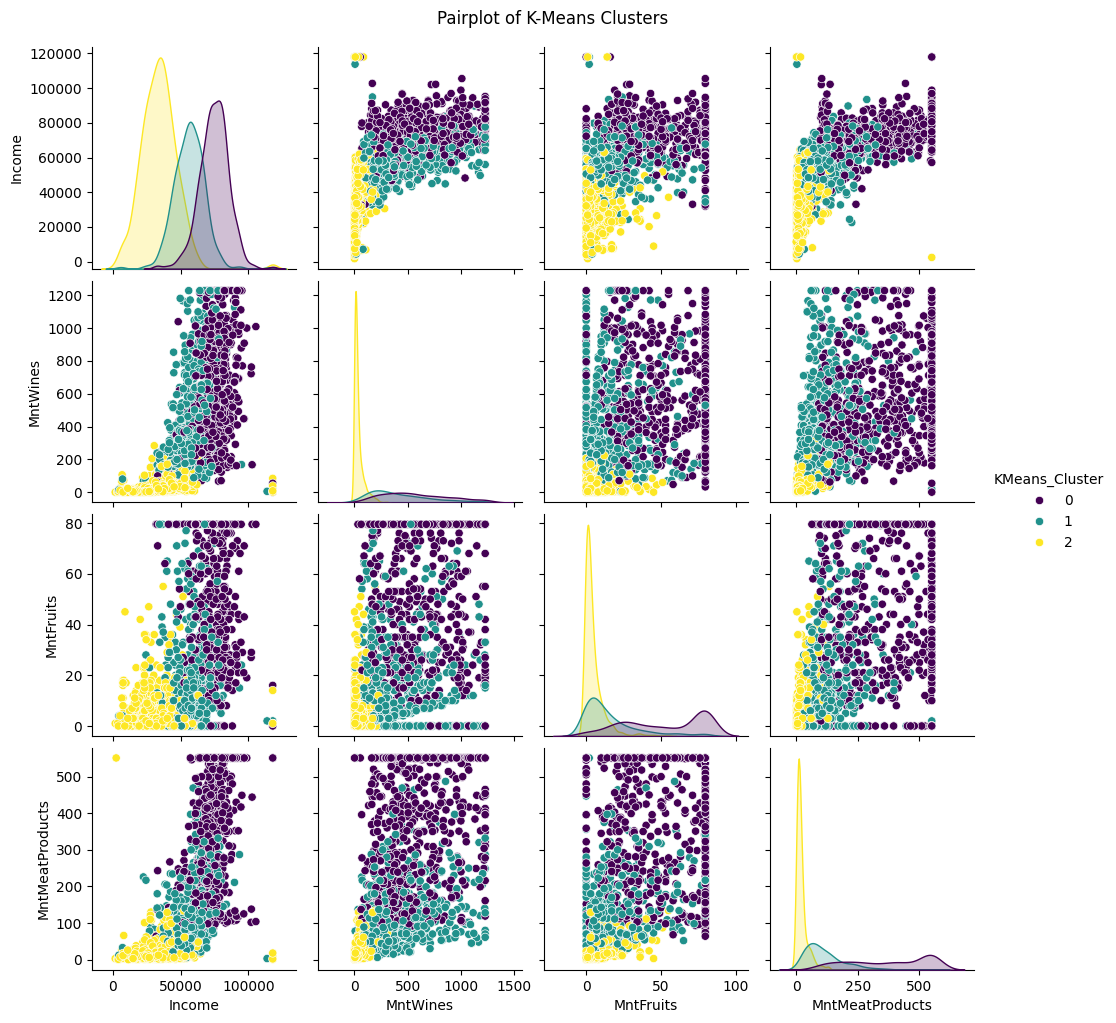

In [92]:
# Visualization based on the best clustering method
if best_method == 'K-Means':
    sns.pairplot(data, hue='KMeans_Cluster', vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts'], palette='viridis')
    plt.suptitle('Pairplot of K-Means Clusters', y=1.02)
    plt.show()
elif best_method == 'DBSCAN':
    sns.pairplot(data, hue='DBSCAN_Cluster', vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts'], palette='viridis')
    plt.suptitle('Pairplot of DBSCAN Clusters', y=1.02)
    plt.show()
elif best_method == 'Agglomerative':
    sns.pairplot(data, hue='Agglo_Cluster', vars=['Income', 'MntWines', 'MntFruits', 'MntMeatProducts'], palette='viridis')
    plt.suptitle('Pairplot of Agglomerative Clusters', y=1.02)
    plt.show()
else:
    print("No best method identified.")